In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.errors import EmptyDataError 

## DNA sequence coding regions and class labels of Human, chimpanzee and dog.

In [ ]:
human_data= pd.read_table('human_data.txt')
human_data.head()
chimp_data= pd.read_table('chimp_data.txt')
dog_data=pd.read_table('dog_data.txt')
chimp_data.head()
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


## Here are the definitions for each of the 7 classes and how many there are in the human training data. They are gene sequence function groups.

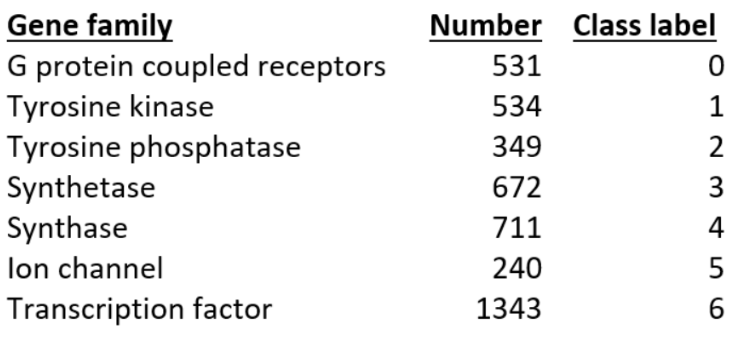

In [ ]:
from IPython.display import Image
Image("Capture1.png")

## Treating DNA sequence as a "language"- k-mer counting

### Defining a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [ ]:
#function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size+1)]

## Converting the training data into short overlapping k-mers of length 6. This is done for the data of each species.

In [ ]:
human_data['words']= human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data= human_data.drop('sequence', axis=1)
chimp_data['words']= chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data=chimp_data.drop('sequence', axis=1)
dog_data['words']= dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data= dog_data.drop('sequence', axis=1)    

### Our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6

In [ ]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


### We convert the list of K-Mers for each gene into string sentences of words that "count vectorizer" can use. Y_label stores the classes for the particular k-mers

In [ ]:
human_texts= list(human_data['words'])##creating a list
for item in range(len(human_texts)):##starting for loop to print all the data in the human_texts list that we just created out of the set of data contianed in human_texts
    human_texts[item]= ' '.join(human_texts[item])
y_data= human_data.iloc[:, 0].values

In [ ]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [ ]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [ ]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [ ]:
chimp_texts= list(chimp_data['words'])##creating a list
for item in range(len(chimp_texts)):##starting for loop to print all the data in the human_texts list that we just created out of the set of data contianed in human_texts
    chimp_texts[item]= ' '.join(chimp_texts[item])
y_chimp= chimp_data.iloc[:, 0].values

In [ ]:
print(chimp_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaac

In [ ]:
dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [ ]:
dog_texts= list(dog_data['words'])##creating a list
for item in range(len(dog_texts)):##starting for loop to print all the data in the human_texts list that we just created out of the set of data contianed in human_texts
    dog_texts[item]= ' '.join(dog_texts[item])
y_dog= dog_data.iloc[:, 0].values

In [ ]:
print(dog_texts[0])

atgcca tgccac gccaca ccacag cacagc acagct cagcta agctag gctaga ctagat tagata agatac gataca atacat tacatc acatcc catcca atccac tccacc ccacct cacctg acctga cctgat ctgatt tgattt gattta atttat tttatt ttatta tattat attata ttataa tataat ataatc taatct aatctt atcttt tctttt cttttc ttttca tttcaa ttcaat tcaata caatat aatatt atattt tatttc atttct tttctc ttctca tctcac ctcacc tcaccc caccct accctc ccctct cctctt ctcttc tcttca cttcat ttcatc tcatcc catcct atccta tcctat cctatt ctattt tatttc atttca tttcaa ttcaac tcaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaatt aaattt aatttc atttca tttcaa ttcaaa tcaaat caaatc aaatca aatcac atcact tcacta cactac actact ctacta tactac actacc ctaccc taccca acccag cccaga ccagaa cagaaa agaaaa gaaaac aaaacc aaaccc aacccg acccga cccgat ccgata cgataa gataac ataacc taacca aaccaa accaaa ccaaat caaatc aaatct aatctg atctgc tctgct ctgcta tgctaa gctaaa ctaaaa taaaat aaaatt aaattg aattgc attgct ttgctg tgctgg gctggt ctggtc tggtca ggtcaa gtcaac tcaaca caacat aacata acataa cataat ataatc

In [ ]:
## Apply BAG of WORDS using CountVectorize(NLP)

In [ ]:
#creating the Bag of Words model using CountVectorizer()
#this is equivalent to the k-mer counting
#the n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(ngram_range=(4,4))#range was chosen after several iterations to put the best values
X= cv.fit_transform(human_texts)
X_chimp= cv.transform(chimp_texts)
X_dog= cv.transform(dog_texts)

In [ ]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### Printing in the form of a bar-graph

# Human gene data v/s the class

<AxesSubplot:>

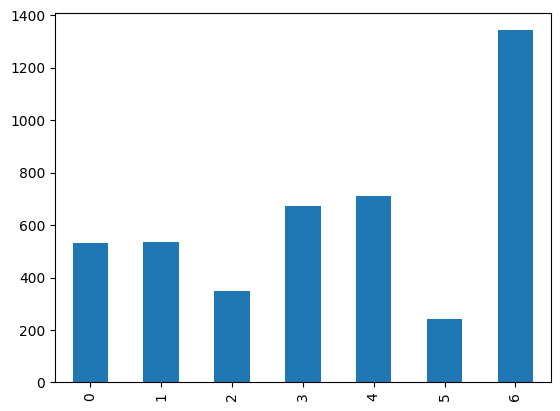

In [ ]:
human_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
X

<4380x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 5406441 stored elements in Compressed Sparse Row format>

In [ ]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_data, test_size = 0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


### Multinomial naive Bayes classifier on Human Gene

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred= classifier.predict(X_test)

### Now we have to check the performance matrix, accuracy, precision, recall and f1 score. This is what determines if our DNA sequencing worked well or not.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          98    0   0    0    1   2    1
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    1   0    0
4           0    0   0    0  146   0    3
5           0    0   0    0    0  51    0
6           0    0   0    1    2   1  261
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


# Chimp gene data v/s class

<AxesSubplot:>

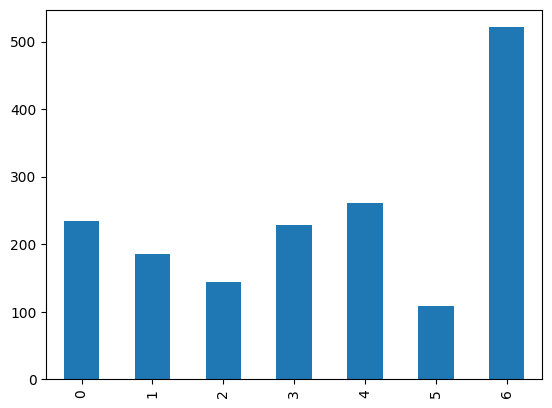

In [ ]:
chimp_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
# Splitting the chimp dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_chimp,y_chimp, test_size = 0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1345, 232414)
(337, 232414)


### Multinomial Naive Bayes classifier on chimp gene.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred= classifier.predict(X_test)

### Now we have to check the performance matrix, accuracy, precision, recall and f1 score. This is to check how well the algo is working.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          25   0   0   0   1   2    0
1           0  38   0   1   0   0    0
2           0   0  26   0   0   0    1
3           0   0   0  41   2   0    0
4           0   1   0   5  44   0    2
5           3   0   0   0   3  21    2
6           0   0   0   6   0   0  113
accuracy = 0.914 
precision = 0.918 
recall = 0.914 
f1 = 0.914


# Dog gene data v/s class

<AxesSubplot:>

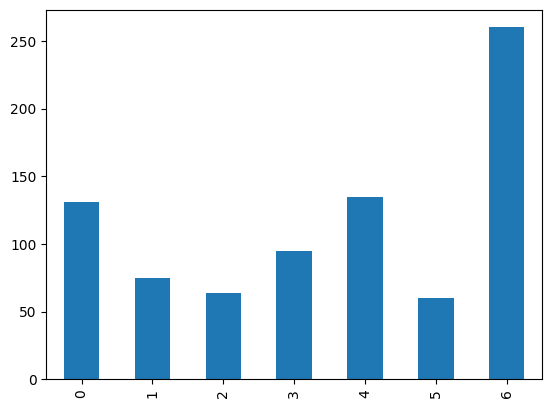

In [ ]:
dog_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
# Splitting the dog dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dog,y_dog, test_size = 0.05, random_state= None)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(779, 232414)
(41, 232414)


### Multinomial naive Bayes classifier on Dog genome

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred= classifier.predict(X_test)

### How well is this algo working?

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1  3  4  5   6
Actual                      
0          5  0  0  0  0   1
1          0  3  0  0  0   0
3          0  0  4  0  0   2
4          2  0  1  1  0   2
5          0  0  0  0  8   0
6          0  0  0  0  0  12
accuracy = 0.805 
precision = 0.843 
recall = 0.805 
f1 = 0.771
